In [1]:
from connattractor import analysis
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
connfile = '../data_in/connectome_partial_correlation.csv'
mtx = pd.read_csv(connfile)
mtx = mtx.drop("Unnamed: 0", axis='columns')
mtx = mtx.drop("GlobSig", axis="columns")
mtx = mtx.drop(0, axis="index")

## Sweep beta with adjusted noise

100%|██████████| 100/100 [00:07<00:00, 13.90it/s]
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)


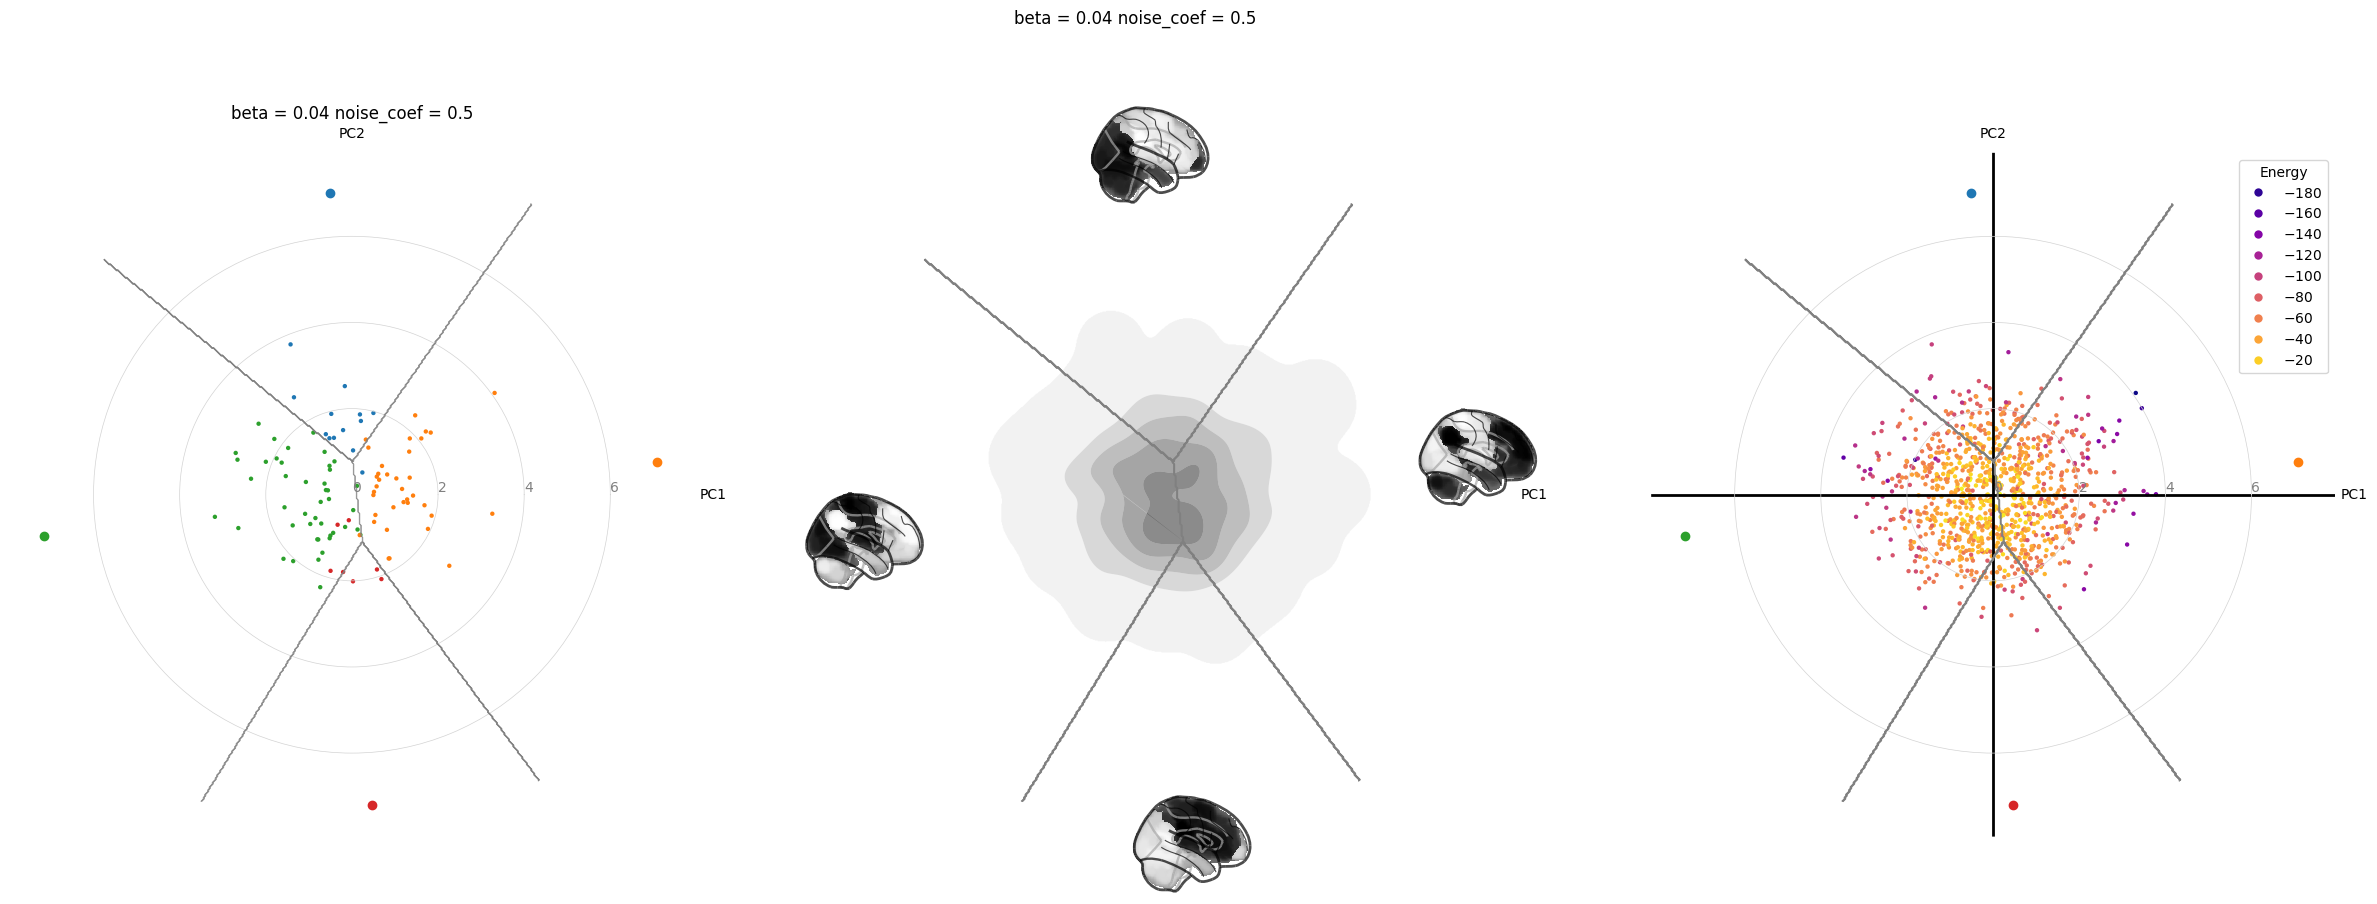

100%|██████████| 100/100 [00:06<00:00, 16.58it/s]
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be i

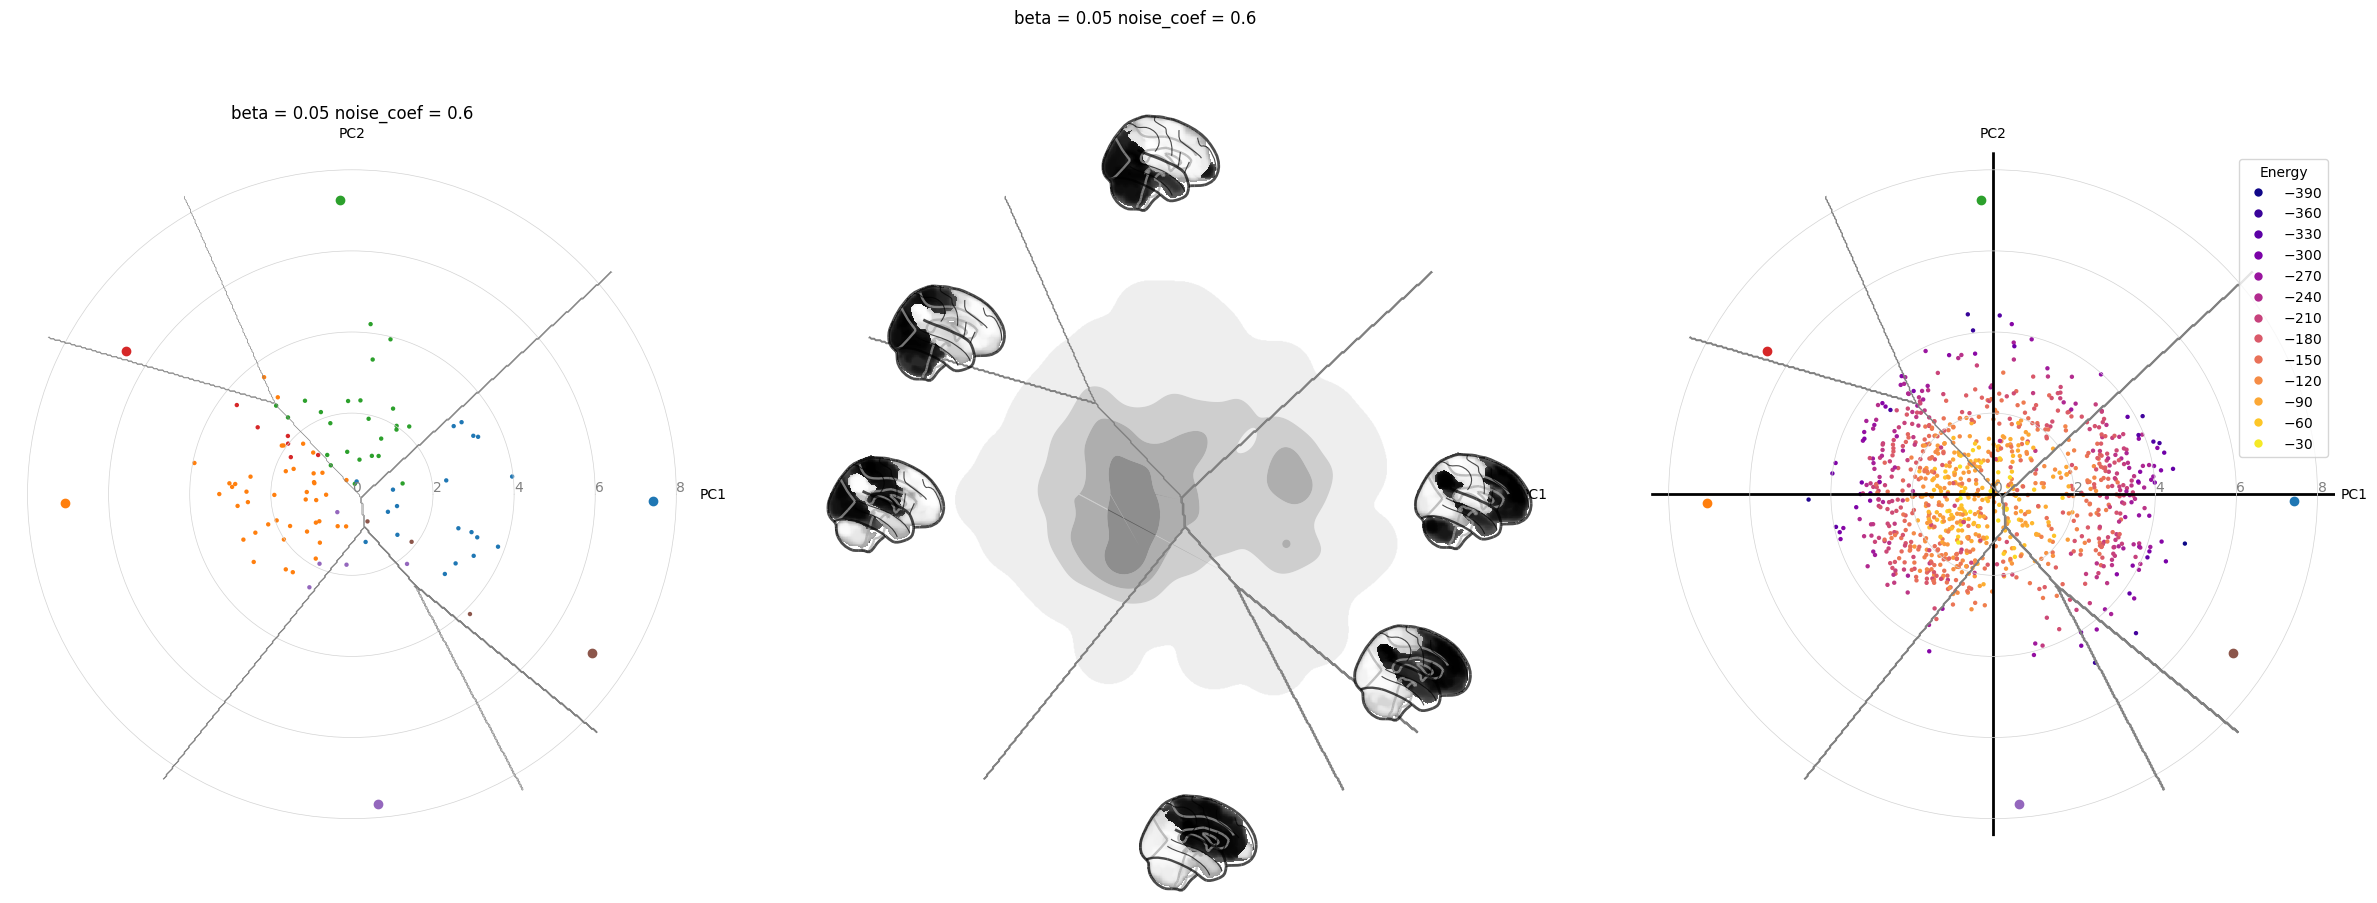

100%|██████████| 100/100 [00:13<00:00,  7.27it/s]
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(th, r, **default_attractor_kwargs)
/home/tspisak/src/connattractor/connattractor/analysis.py:200: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be i

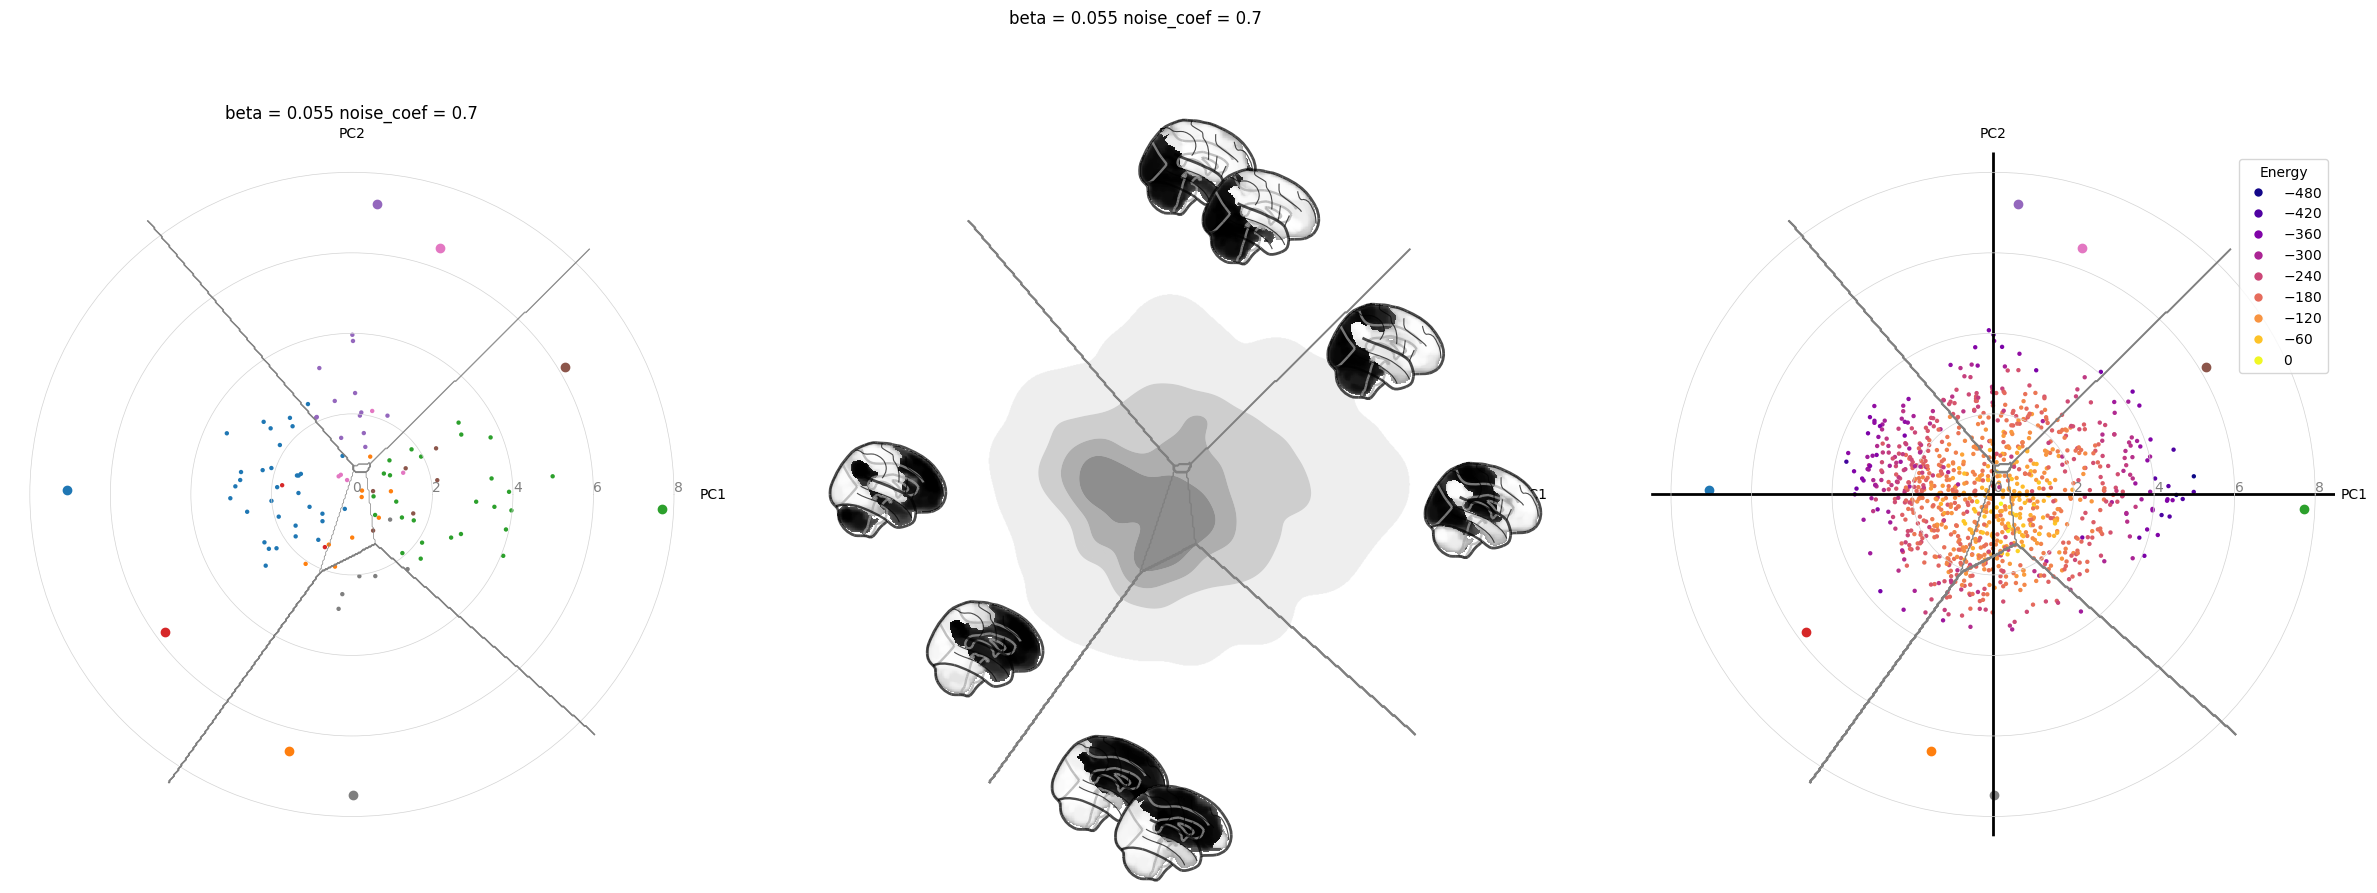

100%|██████████| 100/100 [00:05<00:00, 18.87it/s]


In [ ]:
for beta, noise_coef in [(0.04, 0.5), (0.05, 0.6), (0.055, 0.7), (0.06, 0.8), (0.65, 1), (0.7, 1.5), (0.8, 2)]:
    simresults = analysis.simulate_activations(mtx.values, noise_coef=noise_coef, num_iter=1000, beta=beta)
    hopfield_embedding = analysis.create_embeddings(simresults, attractor_sample=100)

    fig, ax = plt.subplots(ncols=3, subplot_kw={'projection': 'polar'}, figsize=(30, 10))
    fig.suptitle('beta = ' + str(beta) + ' noise_coef = ' + str(noise_coef))
    
    colors = np.array(plt.rcParams['axes.prop_cycle'].by_key()['color'])
    hopfield_embedding.plot(hopfield_embedding.state_sample, s=10, ax=ax[0],
                            c=colors[hopfield_embedding.attractor_sample.astype(int)], 
                            alpha=1, regimes_fill_kwargs=dict(alpha=0),
                            attractor_plot_type='scatter')
    ax[0].set_title('beta = ' + str(beta) + ' noise_coef = ' + str(noise_coef))
    ax[0].xaxis.grid(False)
    
    # black and white contourf
    hopfield_embedding.plot(simresults.states, plot_type='contourf', ax=ax[1],
                            density_bins=1000, density_sigma=20, levels=4, alpha=0.5, cmap='gray_r',
                            attractor_plot_type='glassbrain', 
                            attractor_kwargs=dict(cmap='binary'),
                            regimes_fill_kwargs=dict(alpha=0.0),
                            regimes_contour_kwargs=dict(linewidths=1, colors='gray') 
                           )
    ax[1].set_yticks([])
    ax[1].xaxis.grid(False)
    
    # black and white contour
    hopfield_embedding.plot(simresults.states, c=simresults.energies.astype(float),
                            plot_type='scatter', cmap='plasma', ax=ax[2],
                                 attractor_plot_type='scatter',
                            attractor_kwargs=dict(cmap='binary_r'),
                            regimes_fill_kwargs=dict(alpha=0),
                            regimes_contour_kwargs=dict(linewidths=1, colors='gray'),
                            legend_kwargs=dict(loc="upper right", title="Energy")
                            )
    ax[2].xaxis.grid(False)
    
    plt.show()

# todo:
- map states with low noise and high n, but without attractor calculation
- do the attractor calulcation for a random sample during embedding calculation
- make the attractor model based on that
- plot regimes non linearly (with heatmap?) rectangular grid, bigger than view, then set limits
